# Logistic Regression with Churn Dataset

[Part I: RESEARCH QUESTION](#research-question)<br>

[Part III: DATA PREPARATION AND MANIPULATION](#data-preparation)<br>

- [Checking for Multicollinearity with VIF](#vif)<br>

[Part IV: LOGISTIC REGRESSION MODELS](#regression-model)<br>


 - [ROC Curve](#roccurve)
 - [Regression Curve Plot](#regplot)

# Part I: Research Question<a name = "research-question"></a> 

### Can we predict the probablitiy of Churn of our customers with the variables we have?

In [1]:
# Import libraries and packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import sklearn

from statsmodels.formula.api import logit
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy import stats

import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Load the data
os.chdir('/Users/secil/Documents/WGU-MSDA/Data/churn_clean')
df_original = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns',100)
df_original.shape

(10000, 50)

### Choosing the variables

In [4]:
df_original.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

> **Predictor variables:** `'Gender','Contract','Techie','InternetService','Tenure','Multiple', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharge'`

> **Target variable:** `'Churn'` 

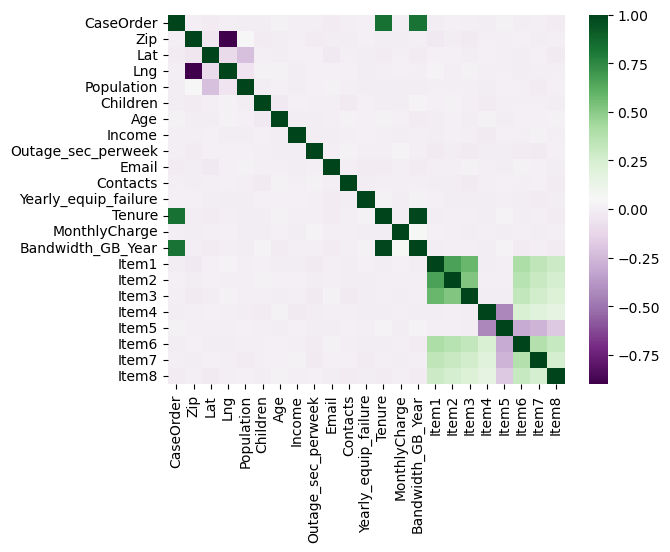

In [5]:
# Looking at the correlation of variables using heatmap
corr = df_original.corr()
sns.heatmap(corr,cmap='PRGn');

In [6]:
# # Create a new dataset with variables for analysis
df = df_original[['Churn','Gender','Contract','Techie','InternetService','Tenure','Multiple', 'OnlineSecurity', 
                  'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'MonthlyCharge']]

# Part III: Data Preparation and Manipulation<a name="data-preparation"></a>

## a) Data Cleaning

In [7]:
# Check for duplicated data
sum(df.duplicated())

0

In [8]:
# Check for null values
df.isnull().sum()

Churn               0
Gender              0
Contract            0
Techie              0
InternetService     0
Tenure              0
Multiple            0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MonthlyCharge       0
dtype: int64

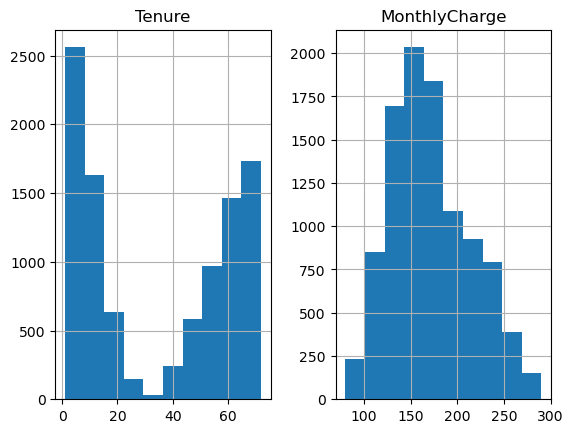

In [9]:
# Check for outliers and distribution
df.hist();

In [10]:
# Check data types
df.dtypes

Churn                object
Gender               object
Contract             object
Techie               object
InternetService      object
Tenure              float64
Multiple             object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
MonthlyCharge       float64
dtype: object

## b) Data Exploration with Visualizations and Summary Statistics

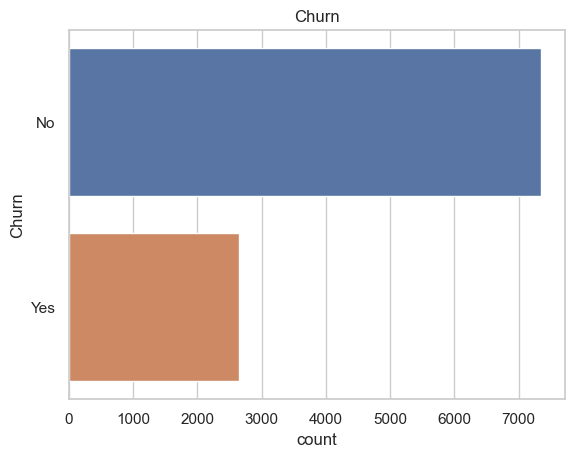

In [11]:
sns.set_theme(style="whitegrid")
sns.countplot(data=df,y='Churn')
plt.title('Churn');
plt.savefig('/Users/secil/Documents/WGU-MSDA/D208/Graphs/Churn.png')

In [12]:
# Churn ratio
print(df.Churn.value_counts())
print('\nPercentage %')
print(df.Churn.value_counts()/len(df.Churn)*100)

No     7350
Yes    2650
Name: Churn, dtype: int64

Percentage %
No     73.5
Yes    26.5
Name: Churn, dtype: float64


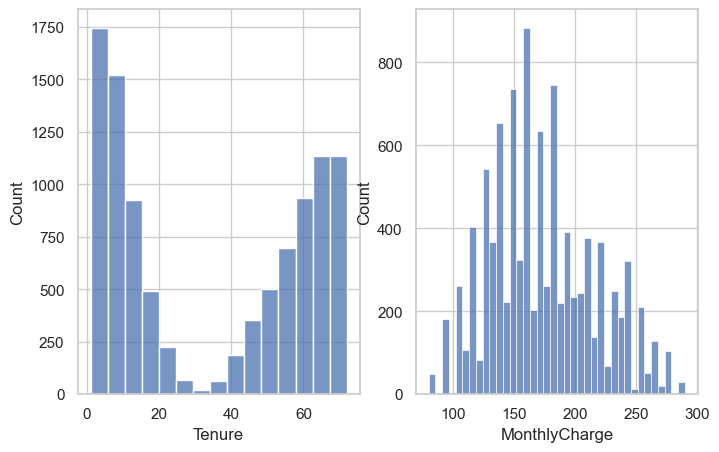

In [13]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Tenure')

plt.subplot(1,2,2)
sns.histplot(data=df, x='MonthlyCharge');
plt.savefig('/Users/secil/Documents/WGU-MSDA/D208/Graphs/Tenure_MonthlyCharge.png')

In [14]:
# Summary Statistics for Continous Variables
df.describe()

,Tenure,MonthlyCharge
count,10000.000000,10000.000000
mean,34.526188,172.624816
std,26.443063,42.943094
min,1.000259,79.978860
25%,7.917694,139.979239
50%,35.430507,167.484700
75%,61.479795,200.734725
max,71.999280,290.160419


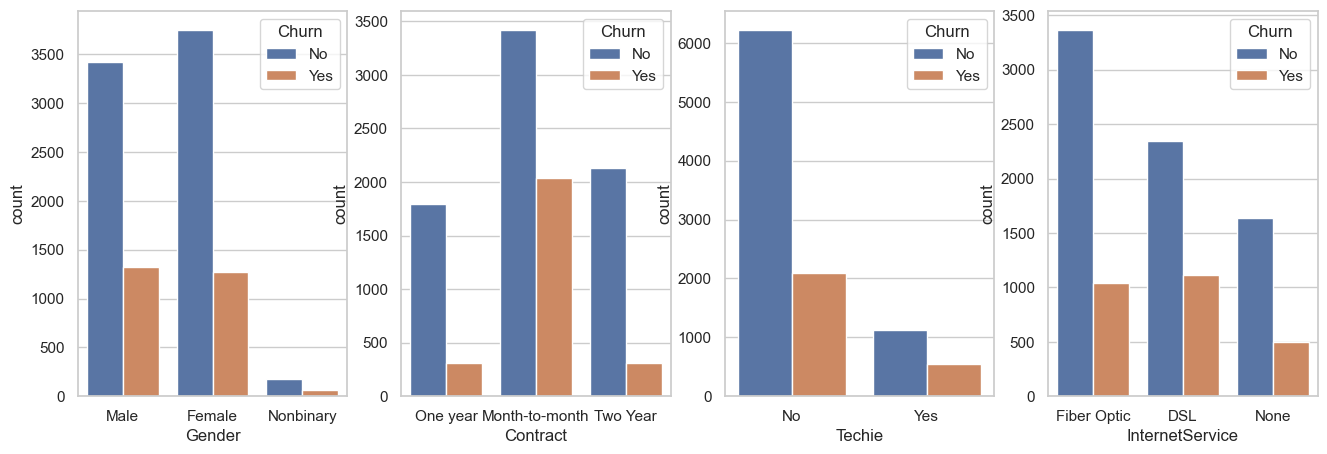

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.countplot(data=df, x='Gender', hue='Churn')

plt.subplot(1,4,2)
sns.countplot(data=df, x='Contract',hue='Churn')

plt.subplot(1,4,3)
sns.countplot(data=df, x='Techie',hue='Churn')

plt.subplot(1,4,4)
sns.countplot(data=df, x='InternetService',hue='Churn');
plt.savefig('/Users/secil/Documents/WGU-MSDA/D208/Graphs/Categorical_1.png')

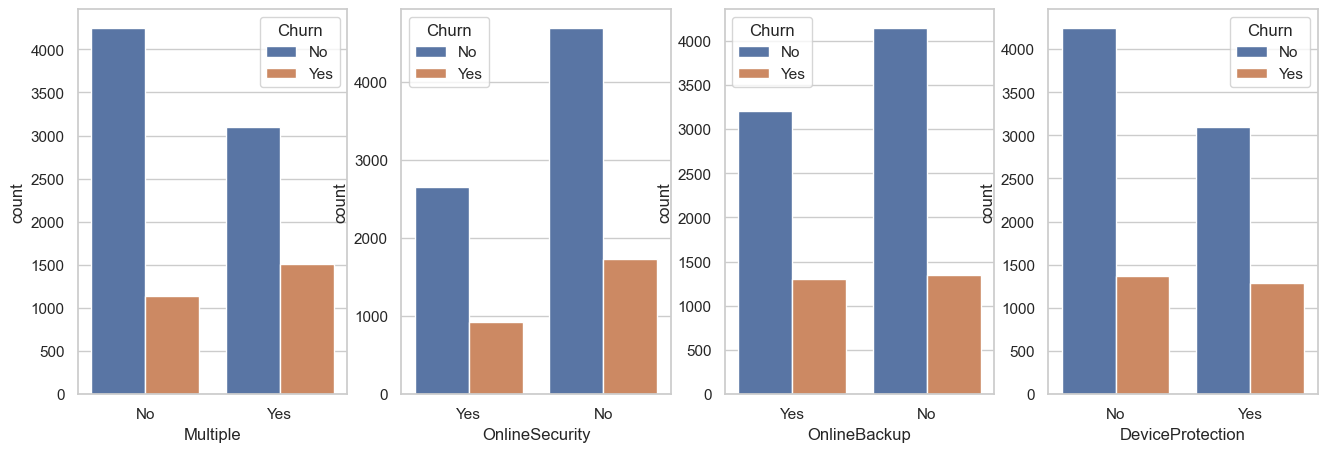

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.countplot(data=df, x='Multiple', hue='Churn')

plt.subplot(1,4,2)
sns.countplot(data=df, x='OnlineSecurity',hue='Churn')

plt.subplot(1,4,3)
sns.countplot(data=df, x='OnlineBackup',hue='Churn')

plt.subplot(1,4,4)
sns.countplot(data=df, x='DeviceProtection',hue='Churn');
plt.savefig('/Users/secil/Documents/WGU-MSDA/D208/Graphs/Categorical_2.png')

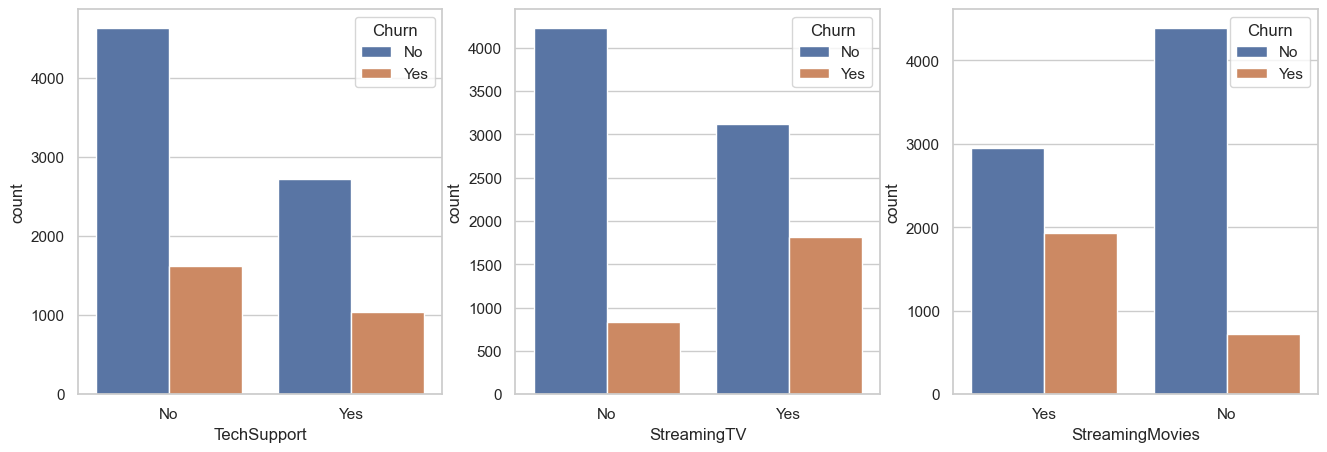

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.countplot(data=df, x='TechSupport', hue='Churn')

plt.subplot(1,3,2)
sns.countplot(data=df, x='StreamingTV',hue='Churn')

plt.subplot(1,3,3)
sns.countplot(data=df, x='StreamingMovies',hue='Churn')


plt.savefig('/Users/secil/Documents/WGU-MSDA/D208/Graphs/Categorical_3.png')

## c) Data Wrangling
#### Re-expression of Categorical Variables

In [18]:
df.nunique()

Churn                  2
Gender                 3
Contract               3
Techie                 2
InternetService        3
Tenure              9996
Multiple               2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
MonthlyCharge        750
dtype: int64

In [19]:
df.Contract.unique(), df.InternetService.unique() 

(array(['One year', 'Month-to-month', 'Two Year'], dtype=object),
 array(['Fiber Optic', 'DSL', 'None'], dtype=object))

In [20]:
df['Churn'].replace(['No','Yes'],[0,1],inplace=True)

In [21]:
df = pd.get_dummies(df, columns=['Contract','InternetService', 'Gender','Techie','Multiple', 'OnlineSecurity','OnlineBackup', 
                                 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies'],
                    drop_first=True)

In [22]:
# Summary Statistics for Categorical Variables (Mean Values)
print('Mean Churn of Predictors')
print(df.groupby('Churn').mean())

Mean Churn of Predictors
          Tenure  MonthlyCharge  Contract_One year  Contract_Two Year  \
Churn                                                                   
0      42.234090     163.008973           0.244218           0.290204   
1      13.147667     199.295175           0.115849           0.116604   

       InternetService_Fiber Optic  InternetService_None  Gender_Male  \
Churn                                                                   
0                         0.458231              0.222177     0.465986   
1                         0.392453              0.187170     0.497736   

       Gender_Nonbinary  Techie_Yes  Multiple_Yes  OnlineSecurity_Yes  \
Churn                                                                   
0              0.023401    0.152925      0.421361            0.361497   
1              0.022264    0.209434      0.570189            0.346792   

       OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_Yes  \
Churn                         

In [23]:
# Save cleaned dataset
df.to_excel('/Users/secil/Documents/WGU-MSDA/D208/cleaned_log_data.xlsx', index=False)

### Multicollinearity Elimination with VIF<a name="vif"></a>

In [24]:
x=df.drop('Churn',axis=1)
y=df[['Churn']]

In [25]:
def vif():
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i)
                      for i in range(len(x.columns))]
    return vif
vif()

,Features,VIF
0,Tenure,2.661505
1,MonthlyCharge,48.323506
2,Contract_One year,1.382467
3,Contract_Two Year,1.443799
4,InternetService_Fiber Optic,3.050977
5,InternetService_None,1.475320
6,Gender_Male,1.924271
7,Gender_Nonbinary,1.045865
8,Techie_Yes,1.202707
9,Multiple_Yes,3.185016


In [26]:
x = x.drop('MonthlyCharge',axis=1)
vif()

,Features,VIF
0,Tenure,2.308325
1,Contract_One year,1.333900
2,Contract_Two Year,1.389750
3,InternetService_Fiber Optic,1.953691
4,InternetService_None,1.453810
5,Gender_Male,1.793703
6,Gender_Nonbinary,1.039955
7,Techie_Yes,1.181709
8,Multiple_Yes,1.722209
9,OnlineSecurity_Yes,1.499295


# Part IV: Logistic Regression Models<a name="regression-model"></a>

## Model 1

In [27]:
x = sm.add_constant(x)
model1 = sm.Logit(y,x).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.224069
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.6125
Time:                        16:18:31   Log-Likelihood:                -2240.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6925      0.132    -12.817      0.000      -1.951      -1.434
Tenure                         -0.1090      0.003    -40.375      0.000      -0.114      -0.104
Contract_One year              -3.3068      0.123    -26.803      0.000      -3.549      -3.065
Contract_Two Year              -3.3741      0.120    -28.049      0.000      -3.610      -3.138
InternetService_Fiber Optic    -1.3632      0.090    -15.121      0.000      -1.540      -1.186
InternetService_None           -1.4341      0.110    -13.070      0.000      -1.649      -1.219
Gender_Male                     0.2722      0.077      3.525      0.000       0.121       0.424
Gender_Nonbinary               -0.1474      0.260     -0.567      0.570      -0.657       0.362
Techie_Yes                      1.0873      0.101     10.740      0.000       0.889       1.286
Multiple_Yes                    1.6359      0.083     19.786      0.000       1.474       1.798
OnlineSecurity_Yes             -0.1408      0.079     -1.775      0.076      -0.296       0.015
OnlineBackup_Yes                0.7957      0.078     10.204      0.000       0.643       0.949
DeviceProtection_Yes            0.4486      0.077      5.841      0.000       0.298       0.599
TechSupport_Yes                 0.2721      0.078      3.472      0.001       0.118       0.426
StreamingTV_Yes                 2.9350      0.096     30.553      0.000       2.747       3.123
StreamingMovies_Yes             3.4513      0.102     33.913      0.000       3.252       3.651
===============================================================================================
"""

In [28]:
predictions1 = model1.predict(x)
pred1 = list(map(round, predictions1))

conf_matrix1 = confusion_matrix(y, pred1) #or model1.pred_table()
print('Confusion Matrix\n',conf_matrix1)

Confusion Matrix
 [[6907  443]
 [ 544 2106]]


In [29]:
# # 2 code partially taken form Datacamp
TN = conf_matrix1[0,0]
TP = conf_matrix1[1,1]
FN = conf_matrix1[1,0]
FP = conf_matrix1[0,1]

# # * 3 code taken from https://ai.plainenglish.io/a-comparison-of-sklearn-and-statsmodels-logistic-regression-function-4340e9fd29dd
# # Accuracy is the proportion of the correct predictions
accuracy = (TN + TP)/(TN + TP +FN + FP)
print('Accuracy score is: ',accuracy)

# # Precision measures the accuracy of a positive outcome
precision = TP/(TP + FP)
print('Precision score is: ',precision)

# # Recall or Sensitiviy measures model's strength to predict positive outcome 
recall = TP/(TP + FN)
print('Recall score is: ',recall)

## Specificity measures a mode's ability to predict a negative outcome
specificity = TN/(TN + FP)
print('Specificity score is: ', specificity)

# # Misclassification rate = 1 - Accuracy
# mis_class = 1 - accuracy
# print('Misclassification rate is: ',mis_class)

Accuracy score is:  0.9013
Precision score is:  0.8262063554335033
Recall score is:  0.7947169811320755
Specificity score is:  0.9397278911564626


In [30]:
conf_mat1 = pd.DataFrame([[TN, FP],
                        [FN, TP]],
                       index=['Actual Not Churned','Actual Churned'],
                       columns=['Predicted Not Churned','Predicted Churned'])
conf_mat1

,Predicted Not Churned,Predicted Churned
Actual Not Churned,6907,443
Actual Churned,544,2106


## Feature Selection using Backward Stepwise Regression 

## Model 2

In [31]:
x = x.drop('Gender_Nonbinary',axis=1)

model2 = sm.Logit(y,x).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.224086
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.6125
Time:                        16:18:31   Log-Likelihood:                -2240.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6986      0.132    -12.908      0.000      -1.957      -1.441
Tenure                         -0.1090      0.003    -40.371      0.000      -0.114      -0.104
Contract_One year              -3.3068      0.123    -26.809      0.000      -3.549      -3.065
Contract_Two Year              -3.3744      0.120    -28.053      0.000      -3.610      -3.139
InternetService_Fiber Optic    -1.3636      0.090    -15.128      0.000      -1.540      -1.187
InternetService_None           -1.4343      0.110    -13.071      0.000      -1.649      -1.219
Gender_Male                     0.2787      0.076      3.650      0.000       0.129       0.428
Techie_Yes                      1.0883      0.101     10.754      0.000       0.890       1.287
Multiple_Yes                    1.6360      0.083     19.788      0.000       1.474       1.798
OnlineSecurity_Yes             -0.1407      0.079     -1.773      0.076      -0.296       0.015
OnlineBackup_Yes                0.7947      0.078     10.194      0.000       0.642       0.947
DeviceProtection_Yes            0.4488      0.077      5.845      0.000       0.298       0.599
TechSupport_Yes                 0.2722      0.078      3.474      0.001       0.119       0.426
StreamingTV_Yes                 2.9349      0.096     30.555      0.000       2.747       3.123
StreamingMovies_Yes             3.4517      0.102     33.917      0.000       3.252       3.651
===============================================================================================
"""

In [32]:
predictions2 = model2.predict(x)
pred2 = list(map(round, predictions2))

conf_matrix2 = confusion_matrix(y, pred2) #or model2.pred_table()
print('Confusion Matrix\n',conf_matrix2)

Confusion Matrix
 [[6910  440]
 [ 543 2107]]


In [33]:
# * code partially taken form Datacamp
TN = conf_matrix2[0,0]
TP = conf_matrix2[1,1]
FN = conf_matrix2[1,0]
FP = conf_matrix2[0,1]

# # * 3 code taken from https://ai.plainenglish.io/a-comparison-of-sklearn-and-statsmodels-logistic-regression-function-4340e9fd29dd
# # Accuracy is the proportion of the correct predictions
accuracy = (TN + TP)/(TN + TP +FN + FP)
print('Accuracy score is: ',accuracy)

# # Precision measures the accuracy of a positive outcome
precision = TP/(TP + FP)
print('Precision score is: ',precision)

# # Recall or Sensitiviy measures proportion of 1s that are correctly identified
recall = TP/(TP + FN)
print('Recall score is: ',recall)

## Specificity measures a mode's ability to predict a negative outcome
specificity = TN/(TN + FP)
print('Specificity score is: ', specificity)

# # Misclassification rate = 1 - Accuracy
# mis_class = 1 - accuracy
# print('Misclassification rate is: ',mis_class)

Accuracy score is:  0.9017
Precision score is:  0.8272477424420888
Recall score is:  0.7950943396226415
Specificity score is:  0.9401360544217687


In [34]:
conf_mat2 = pd.DataFrame([[TN, FP],
                        [FN, TP]],
                       index=['Actual Not Churned','Actual Churned'],
                       columns=['Predicted Not Churned','Predicted Churned'])
conf_mat2

,Predicted Not Churned,Predicted Churned
Actual Not Churned,6910,440
Actual Churned,543,2107


## Model 3 (Final)

In [35]:
x = x.drop('OnlineSecurity_Yes',axis=1)

model3 = sm.Logit(y,x).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.224243
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.6122
Time:                        16:18:31   Log-Likelihood:                -2242.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7457      0.129    -13.529      0.000      -1.999      -1.493
Tenure                         -0.1090      0.003    -40.378      0.000      -0.114      -0.104
Contract_One year              -3.3028      0.123    -26.807      0.000      -3.544      -3.061
Contract_Two Year              -3.3789      0.120    -28.088      0.000      -3.615      -3.143
InternetService_Fiber Optic    -1.3631      0.090    -15.129      0.000      -1.540      -1.187
InternetService_None           -1.4306      0.110    -13.049      0.000      -1.646      -1.216
Gender_Male                     0.2758      0.076      3.613      0.000       0.126       0.425
Techie_Yes                      1.0933      0.101     10.806      0.000       0.895       1.292
Multiple_Yes                    1.6358      0.083     19.795      0.000       1.474       1.798
OnlineBackup_Yes                0.7937      0.078     10.186      0.000       0.641       0.946
DeviceProtection_Yes            0.4481      0.077      5.838      0.000       0.298       0.599
TechSupport_Yes                 0.2708      0.078      3.457      0.001       0.117       0.424
StreamingTV_Yes                 2.9327      0.096     30.548      0.000       2.745       3.121
StreamingMovies_Yes             3.4492      0.102     33.914      0.000       3.250       3.649
===============================================================================================
"""

In [36]:
predictions3 = model3.predict(x)
pred3 = list(map(round, predictions3))
                              
conf_matrix3 = confusion_matrix(y, pred3) #or model3.pred_table()
print('Confusion Matrix\n',conf_matrix3)

Confusion Matrix
 [[6905  445]
 [ 544 2106]]


In [37]:
TN = conf_matrix3[0,0]
TP = conf_matrix3[1,1]
FN = conf_matrix3[1,0]
FP = conf_matrix3[0,1]

# # * 3 code taken from https://ai.plainenglish.io/a-comparison-of-sklearn-and-statsmodels-logistic-regression-function-4340e9fd29dd
# # Accuracy is the proportion of the correct predictions
accuracy = (TN + TP)/(TN + TP +FN + FP)
print('Accuracy score is: ',accuracy)

# # Precision measures the accuracy of a positive outcome
precision = TP/(TP + FP)
print('Precision score is: ',precision)

# # Recall or Sensitiviy measures model's strength to predict positive outcome 
recall = TP/(TP + FN)
print('Recall score is: ',recall)

## Specificity measures a model's ability to predict a negative outcome
specificity = TN/(TN + FP)
print('Specificity score is: ',specificity)
# # Misclassification rate = 1 - Accuracy
# mis_class = 1 - accuracy
# print('Misclassification rate is: ',mis_class)

Accuracy score is:  0.9011
Precision score is:  0.8255586044688358
Recall score is:  0.7947169811320755
Specificity score is:  0.9394557823129251


In [38]:
conf_mat3 = pd.DataFrame([[TN, FP],
                        [FN, TP]],
                       index=['Actual Not Churned','Actual Churned'],
                       columns=['Predicted Not Churned','Predicted Churned'])
conf_mat3

,Predicted Not Churned,Predicted Churned
Actual Not Churned,6905,445
Actual Churned,544,2106


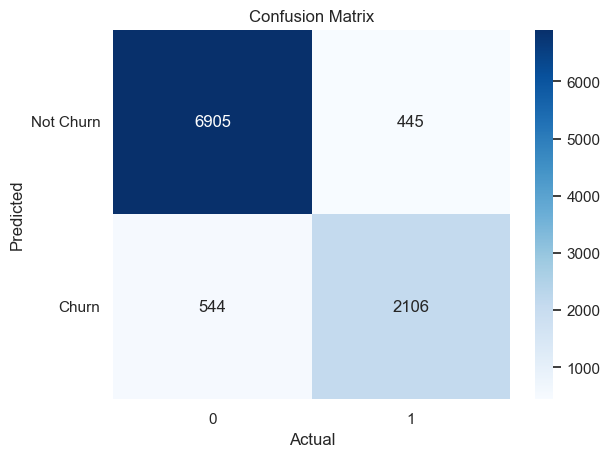

In [39]:
# * 3 COde taken from https://medium.com/@ugursavci/machine-learning-101-logistic-regression-fa7b4bf9ca6b 
sns.heatmap(conf_matrix3, annot=True, cmap='Blues',fmt='g', yticklabels=['Not Churn','Churn'])
plt.yticks(rotation=0)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix');
plt.savefig('/Users/secil/Documents/WGU-MSDA/D208/Graphs/ConfMatrix_heatmap.png')

In [40]:
np.exp(model3.params)

const                           0.174515
Tenure                          0.896720
Contract_One year               0.036778
Contract_Two Year               0.034086
InternetService_Fiber Optic     0.255856
InternetService_None            0.239158
Gender_Male                     1.317543
Techie_Yes                      2.984027
Multiple_Yes                    5.133483
OnlineBackup_Yes                2.211455
DeviceProtection_Yes            1.565313
TechSupport_Yes                 1.310958
StreamingTV_Yes                18.778048
StreamingMovies_Yes            31.476273
dtype: float64

In [41]:
# negative coeffcients is less positives is more
# 1/1+e^x
1/(1+np.exp(model3.params))

const                          0.851415
Tenure                         0.527226
Contract_One year              0.964526
Contract_Two Year              0.967038
InternetService_Fiber Optic    0.796270
InternetService_None           0.807000
Gender_Male                    0.431491
Techie_Yes                     0.251002
Multiple_Yes                   0.163039
OnlineBackup_Yes               0.311385
DeviceProtection_Yes           0.389816
TechSupport_Yes                0.432721
StreamingTV_Yes                0.050561
StreamingMovies_Yes            0.030792
dtype: float64

## ROC Curve<a name = 'roccurve'></a>

Roc Curve (Receiver Operating Characteristics) is comparison of Sensitivity vs Specificity. The more the curve hugs the top left, the the better 
the model does at classifying the data into categories

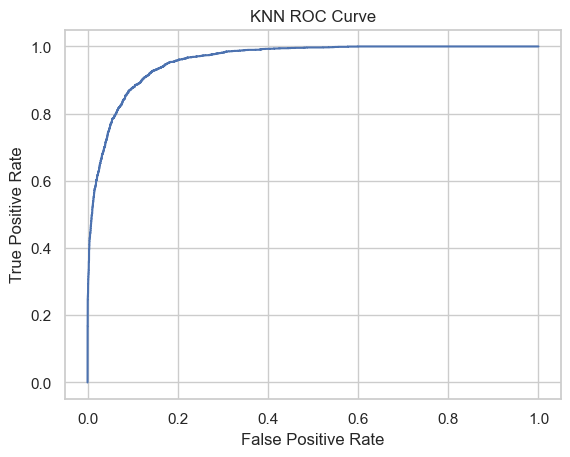

In [45]:
# Roc Curve
fpr, tpr, _ = roc_curve(y, predictions3) # from model3.predict(x)
roc_df = pd.DataFrame({'recall':tpr, 'specificity':fpr})

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve');
plt.savefig('/Users/secil/Documents/WGU-MSDA/D208/Graphs/ROC_curve.png')

## Logistic Regression Curve Plot <a name = 'regplot'></a>

In [ ]:
# *4 code taken from https://www.statology.org/plot-logistic-regression-in-python/
sns.regplot(x=predictions3, y=y, data=df, logistic=True, ci=None); #x_bins=50
plt.title('Logistic Regression Curve Plot')
plt.savefig('/Users/secil/Documents/WGU-MSDA/D208/Graphs/Log_reg_curveplot.png')

> #### The x-axis shows the values of the predictor variables and the y-axis displays the predicted probability of Churning.

> #### We can clearly see that higher values of predictor values are associated with higher probabilities that an individual churning.